In [59]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
fn = './data/*.nc4'

In [52]:
ds = xr.open_mfdataset(fn)

#print(ds.variables['precipitationCal'])
#print(ds.__dict__['BeginDate'])

#for dim in ds.dimensions.values():
#    print(dim)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [14]:
print(ds.variables.keys())

dict_keys(['time', 'time_bnds', 'lon', 'lat', 'precipitationCal', 'precipitationCal_cnt', 'precipitationCal_cnt_cond', 'HQprecipitation', 'HQprecipitation_cnt', 'HQprecipitation_cnt_cond', 'randomError', 'randomError_cnt'])


In [18]:
ds['precipitationCal'].sel(lat=latitude, lon=longitude)

[40.  40.5 41.  41.5 42. ]


In [31]:
ds

,Array,Chunk
Bytes,15.01 kB,16 B
Shape,"(938, 2)","(1, 2)"
Count,2814 Tasks,938 Chunks
Type,datetime64[ns],numpy.ndarray
,Array,Chunk
Bytes,112.56 kB,120 B
Shape,"(938, 6, 5)","(1, 6, 5)"
Count,2814 Tasks,938 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [32]:
ds["precipitationCal"]["lat"].values[:]

array([40. , 40.5, 41. , 41.5, 42. ])

In [34]:
print("The min and max latitude values in the data is:",
      ds["precipitationCal"]["lat"].values.min(),
      ds["precipitationCal"]["lat"].values.max())
print("The min and max longitude values in the data is:",
      ds["precipitationCal"]["lon"].values.min(),
      ds["precipitationCal"]["lon"].values.max())


The min and max latitude values in the data is: 40.0 42.0
The min and max longitude values in the data is: 25.625 28.75


In [36]:
print("The min and max precipitation value in the data is (in mm):",
      ds["precipitationCal"].values.min(),
      ds["precipitationCal"].values.max())


The min and max precipitation value in the data is (in mm): 0.0 244.36389


In [63]:
longitudes = ds["precipitationCal"]["lon"]
latitudes = ds["precipitationCal"]["lat"]
longitude = longitudes.min()
latitude = latitudes.max()
q = ds['precipitationCal'].sel(lon=longitude, lat=latitude)
q

,Array,Chunk
Bytes,3.75 kB,4 B
Shape,"(938,)","(1,)"
Count,3752 Tasks,938 Chunks
Type,float32,numpy.ndarray


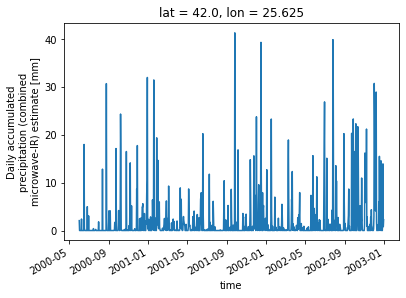

In [64]:
#maxP = np.argmax(np.max(q, axis=0))
#maxP
#np.where(q == np.max(q))
q.plot.line()
plt.show()

In [75]:
q_df = q.to_dataframe()
q_df

,lat,lon,precipitationCal
time,,,
2000-06-01,42.0,25.625,2.068046
2000-06-02,42.0,25.625,0.000000
2000-06-03,42.0,25.625,0.000000
2000-06-04,42.0,25.625,0.000000
2000-06-05,42.0,25.625,0.000000
...,...,...,...
2002-12-27,42.0,25.625,0.000000
2002-12-28,42.0,25.625,1.338078
2002-12-29,42.0,25.625,13.946482


In [78]:
q_df_higher_than_100 = q_df[q_df['precipitationCal'] > 20]
q_df_higher_than_100

,lat,lon,precipitationCal
time,,,
2000-08-24,42.0,25.625,30.745834
2000-10-07,42.0,25.625,24.378942
2000-12-29,42.0,25.625,32.032932
2001-01-18,42.0,25.625,31.517523
2001-06-19,42.0,25.625,20.267876
2001-09-26,42.0,25.625,41.377739
2001-12-02,42.0,25.625,23.806820
2001-12-16,42.0,25.625,39.384556
2002-01-17,42.0,25.625,23.330050
